<a href="https://colab.research.google.com/github/Tanuka-Mondal/Fuzzy/blob/main/fuzzy_describe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install -U scikit-fuzzy

In [12]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

In [13]:
import matplotlib.pyplot as plt

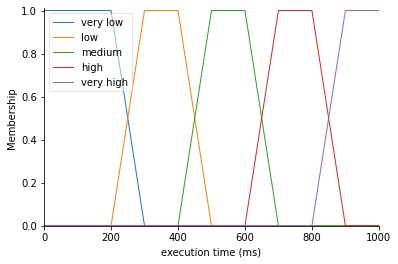

In [4]:
ei = ctrl.Antecedent(np.arange(0,1001,1),'execution time (ms)') #mili second
ei['very low'] = fuzzy.trapmf(ei.universe,[0,0,200,300])
ei['low'] = fuzzy.trapmf(ei.universe,[200,300,400,500])
ei['medium'] = fuzzy.trapmf(ei.universe,[400,500,600,700])
ei['high'] = fuzzy.trapmf(ei.universe,[600,700,800,900])
ei['very high'] = fuzzy.trapmf(ei.universe,[800,900,1000,1000])
ei.view()

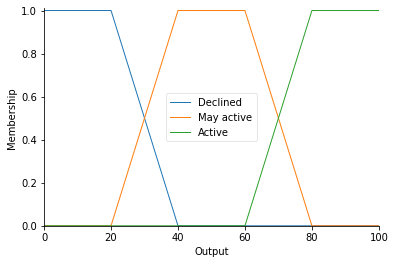

In [5]:
si = ctrl.Consequent(np.arange(0,101,1),'Output')
#names = ['Declined','May active','Active']
#si.automf(names = names)
si['Declined'] = fuzzy.trapmf(si.universe,[0,0,20,40])
si['May active'] = fuzzy.trapmf(si.universe,[20,40,60,80])
si['Active'] = fuzzy.trapmf(si.universe,[60,80,100,100])
si.view()

In [6]:
rule1 = ctrl.Rule(ei['very low'],si['Active'])
rule2 = ctrl.Rule(ei['low'],si['Active'])
rule3 = ctrl.Rule(ei['medium'],si['May active'])
rule4 = ctrl.Rule(ei['high'],si['Declined'])
rule5 = ctrl.Rule(ei['very high'],si['Declined'])

In [7]:
op = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
Sensor = ctrl.ControlSystemSimulation(op)

In [8]:
def SensorOutput():
  Sensor.input['execution time (ms)'] = float(input("execution time: "))
  #Sensor.input['idle time (ms)'] = float(input("idle time: "))
  #Sensor.input['priority factor'] = float(input("priority factor: "))
  #Sensor.input['Battery percentage'] = float(input("battery percentage: "))
  Sensor.compute()
  #print(Tip.output['Output'])
  print("chance of activation of sensor: "+'{0:.6g}'.format(Sensor.output['Output']) + "%")
  ei.view(sim=Sensor)
  si.view(sim=Sensor)

execution time: 240
chance of activation of sensor: 82.8235%


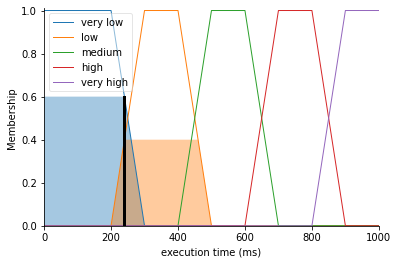

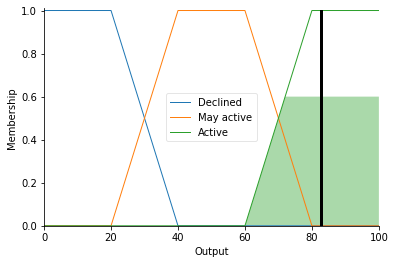

In [9]:
SensorOutput()

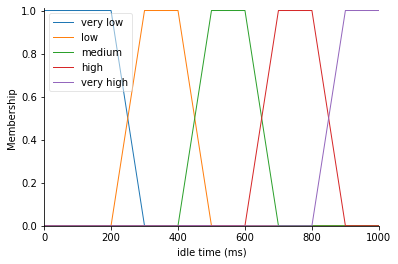

In [14]:
Ii = ctrl.Antecedent(np.arange(0,1001,1),'idle time (ms)')
Ii['very low'] = fuzzy.trapmf(Ii.universe,[0,0,200,300])
Ii['low'] = fuzzy.trapmf(Ii.universe,[200,300,400,500])
Ii['medium'] = fuzzy.trapmf(Ii.universe,[400,500,600,700])
Ii['high'] = fuzzy.trapmf(Ii.universe,[600,700,800,900])
Ii['very high'] = fuzzy.trapmf(Ii.universe,[800,900,1000,1000])
Ii.view()

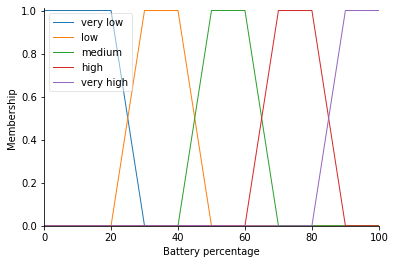

In [15]:
bi = ctrl.Antecedent(np.arange(0,101,1),'Battery percentage')
bi['very low'] = fuzzy.trapmf(bi.universe,[0,0,20,30])
bi['low'] = fuzzy.trapmf(bi.universe,[20,30,40,50])
bi['medium'] = fuzzy.trapmf(bi.universe,[40,50,60,70])
bi['high'] = fuzzy.trapmf(bi.universe,[60,70,80,90])
bi['very high'] = fuzzy.trapmf(bi.universe,[80,90,100,100])
bi.view()

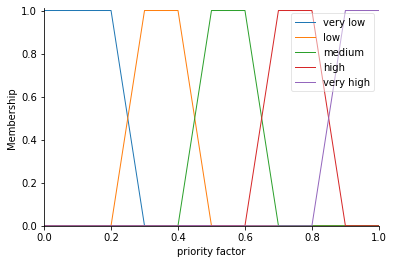

In [16]:
pi = ctrl.Antecedent(np.arange(0,1.1,0.1),'priority factor')
pi['very low'] = fuzzy.trapmf(pi.universe,[0,0,0.2,0.3])
pi['low'] = fuzzy.trapmf(pi.universe,[0.2,0.3,0.4,0.5])
pi['medium'] = fuzzy.trapmf(pi.universe,[0.4,0.5,0.6,0.7])
pi['high'] = fuzzy.trapmf(pi.universe,[0.6,0.7,0.8,0.9])
pi['very high'] = fuzzy.trapmf(pi.universe,[0.8,0.9,1,1])
pi.view()

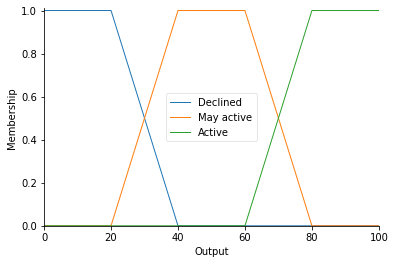

In [17]:
si = ctrl.Consequent(np.arange(0,101,1),'Output')
#names = ['Declined','May active','Active']
#si.automf(names = names)
si['Declined'] = fuzzy.trapmf(si.universe,[0,0,20,40])
si['May active'] = fuzzy.trapmf(si.universe,[20,40,60,80])
si['Active'] = fuzzy.trapmf(si.universe,[60,80,100,100])
si.view()

In [18]:
rule6 = ctrl.Rule(Ii['very low'] ,si['Declined'])
rule7 = ctrl.Rule(Ii['low'] ,si['Declined'])
rule8 = ctrl.Rule(Ii['medium'] ,si['May active'])
rule9 = ctrl.Rule(Ii['high'],si['Active'])
rule10 = ctrl.Rule(Ii['very high'],si['Active'])

In [19]:
op = ctrl.ControlSystem([rule6,rule7,rule8,rule9,rule10])
Sensor = ctrl.ControlSystemSimulation(op)
def SensorOutput():
  #Sensor.input['execution time (ms)'] = float(input("execution time: "))
  Sensor.input['idle time (ms)'] = float(input("idle time: "))
  #Sensor.input['priority factor'] = float(input("priority factor: "))
  #Sensor.input['Battery percentage'] = float(input("battery percentage: "))
  Sensor.compute()
  #print(Tip.output['Output'])
  print("chance of activation of sensor: "+'{0:.6g}'.format(Sensor.output['Output']) + "%")
  Ii.view(sim=Sensor)
  si.view(sim=Sensor)

idle time: 460
chance of activation of sensor: 40.5278%


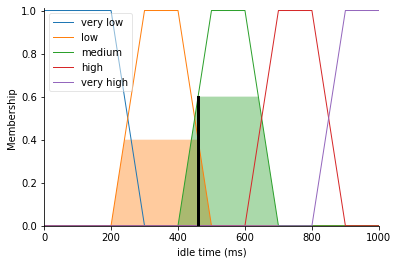

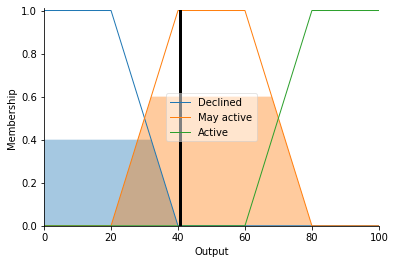

In [21]:
SensorOutput()

In [23]:
rule11 = ctrl.Rule(pi['very low'] ,si['Declined'])
rule12 = ctrl.Rule(pi['low'] ,si['Declined'])
rule13 = ctrl.Rule(pi['medium'] ,si['May active'])
rule14 = ctrl.Rule(pi['high'],si['Active'])
rule15 = ctrl.Rule(pi['very high'],si['Active'])

In [24]:
op = ctrl.ControlSystem([rule11,rule12,rule13,rule14,rule15])
Sensor = ctrl.ControlSystemSimulation(op)
def SensorOutput():
  #Sensor.input['execution time (ms)'] = float(input("execution time: "))
  #Sensor.input['idle time (ms)'] = float(input("idle time: "))
  Sensor.input['priority factor'] = float(input("priority factor: "))
  #Sensor.input['Battery percentage'] = float(input("battery percentage: "))
  Sensor.compute()
  #print(Tip.output['Output'])
  print("chance of activation of sensor: "+'{0:.6g}'.format(Sensor.output['Output']) + "%")
  pi.view(sim=Sensor)
  si.view(sim=Sensor)

priority factor: 0.9
chance of activation of sensor: 84.4444%


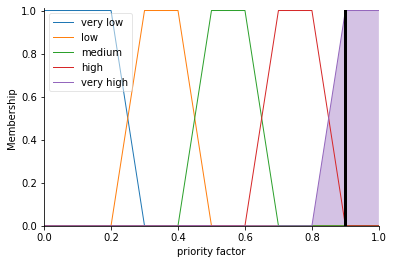

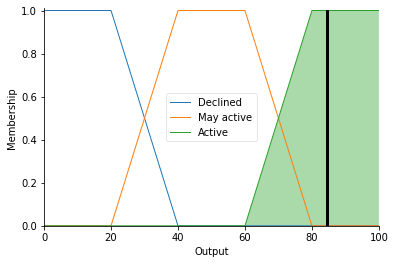

In [25]:
SensorOutput()

In [26]:
rule16 = ctrl.Rule(bi['very low'] ,si['Declined'])
rule17 = ctrl.Rule(bi['low'] ,si['Declined'])
rule18 = ctrl.Rule(bi['medium'] ,si['May active'])
rule19 = ctrl.Rule(bi['high'],si['Active'])
rule20 = ctrl.Rule(bi['very high'],si['Active'])

In [28]:
op = ctrl.ControlSystem([rule16,rule17,rule18,rule19,rule20])
Sensor = ctrl.ControlSystemSimulation(op)
def SensorOutput():
  #Sensor.input['execution time (ms)'] = float(input("execution time: "))
  #Sensor.input['idle time (ms)'] = float(input("idle time: "))
  #Sensor.input['priority factor'] = float(input("priority factor: "))
  Sensor.input['Battery percentage'] = float(input("battery percentage: "))
  Sensor.compute()
  #print(Tip.output['Output'])
  print("chance of activation of sensor: "+'{0:.6g}'.format(Sensor.output['Output']) + "%")
  bi.view(sim=Sensor)
  si.view(sim=Sensor)

battery percentage: 68
chance of activation of sensor: 73.746%


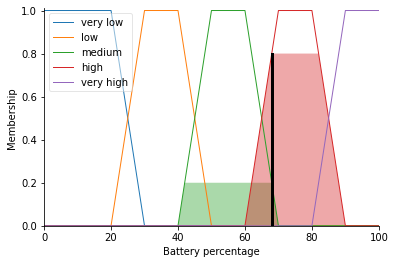

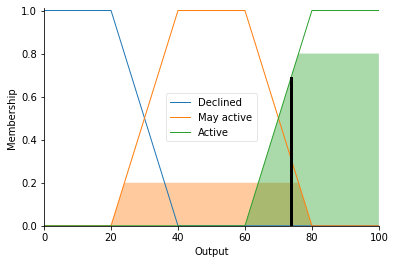

In [32]:
SensorOutput()